In [1]:
import keras as K
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras import layers
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
X = pd.read_csv('Xmfcc_mean.csv', sep=';')
X.shape

(1364, 120)

In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,-264.792786,125.539139,-62.624714,28.315695,1.279387,-8.616631,-4.265706,12.050941,-27.621435,-7.861643,...,-1.748398,-0.898110,-0.119338,0.555444,0.690031,0.893465,0.846773,0.283752,-0.185898,-0.130898
1,-272.888550,121.097145,-41.149326,36.463421,7.565406,-16.098637,-6.408170,3.941464,-18.141294,-10.447558,...,-1.295892,-0.857775,-0.163954,0.522544,0.864576,0.903463,0.971885,0.158906,0.127875,0.256920
2,-252.119629,140.533325,-48.734734,25.311930,11.052135,-15.032625,-15.175117,-0.740196,-12.050269,-6.450643,...,-1.269958,-0.506434,0.136597,0.658416,1.204028,1.187821,1.145636,0.580611,0.591504,0.303071
3,-301.812012,115.630440,-44.689743,40.499535,12.119360,-9.788790,-14.219805,6.883999,-16.215971,-5.742364,...,-1.433162,-0.537758,-0.466619,0.289152,0.665391,0.794946,0.723460,1.131353,0.772526,-0.120861
4,-256.258118,118.041618,-61.199539,42.643768,14.546075,-13.713741,-13.657145,7.992791,-25.783739,-8.232481,...,-0.783558,-0.262848,-0.175987,0.290252,0.595873,1.549510,1.445828,0.597592,0.366670,0.384863


In [5]:
xtrain, xtest = train_test_split(X)

xtrain.shape, xtest.shape

((1023, 120), (341, 120))

In [42]:
xtrain.iloc[0].shape

(120,)

___

In [81]:
K.backend.clear_session()

input_sig = K.Input(batch_shape=(None,xtrain.iloc[0].shape[0],1)) # 120x1

e = layers.Conv1D(30,4, activation='relu', padding='same')(input_sig)
__pool = 2
e = layers.AveragePooling1D(__pool)(e)
f = layers.Flatten()(e)
print(e.shape)
d = layers.Reshape((e.shape[1],e.shape[2]))(f)
d = layers.UpSampling1D(__pool)(d)
d = layers.Conv1D(1,1,strides=1, activation='linear', padding='same')(d)


autoencoder = K.Model(input_sig, d, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

K.backend.clear_session()
history = autoencoder.fit(x=xtrain,
                          y=xtrain,
                          epochs=20,
                          batch_size=10,
                          shuffle=True,
                          validation_data=(xtest, xtest)
                         )

plt.figure(figsize=(12, 6))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.grid()
plt.show()

(None, 60, 30)
Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 120, 30)           150       
_________________________________________________________________
average_pooling1d (AveragePo (None, 60, 30)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1800)              0         
_________________________________________________________________
reshape (Reshape)            (None, 60, 30)            0         
_________________________________________________________________
up_sampling1d (UpSampling1D) (None, 120, 30)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 120,

Epoch 1/20
103/103 [==============================] - 1s 5ms/step - loss: 990.4271 - val_loss: 970.9852
Epoch 2/20
103/103 [==============================] - 0s 4ms/step - loss: 990.4207 - val_loss: 970.9803
Epoch 3/20
103/103 [==============================] - 0s 5ms/step - loss: 990.4158 - val_loss: 970.9750
Epoch 4/20
103/103 [==============================] - 0s 4ms/step - loss: 990.4116 - val_loss: 970.9711
Epoch 5/20
103/103 [==============================] - 1s 5ms/step - loss: 990.4081 - val_loss: 970.9671
Epoch 6/20
103/103 [==============================] - 0s 5ms/step - loss: 990.4045 - val_loss: 970.9636
Epoch 7/20
103/103 [==============================] - 0s 4ms/step - loss: 990.4021 - val_loss: 970.9631
Epoch 8/20
103/103 [==============================] - 0s 4ms/step - loss: 990.3999 - val_loss: 970.9589
Epoch 9/20
103/103 [==============================] - 0s 5ms/step - loss: 990.3979 - val_loss: 970.9570
Epoch 10/20
103/103 [==============================] - 0s 4ms/st

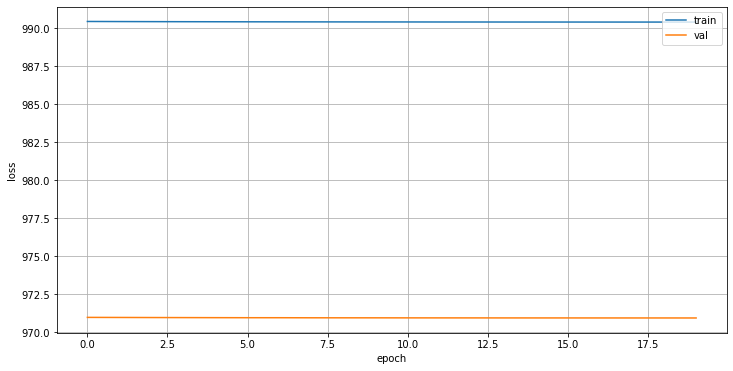

CPU times: user 10.1 s, sys: 737 ms, total: 10.9 s
Wall time: 10.9 s


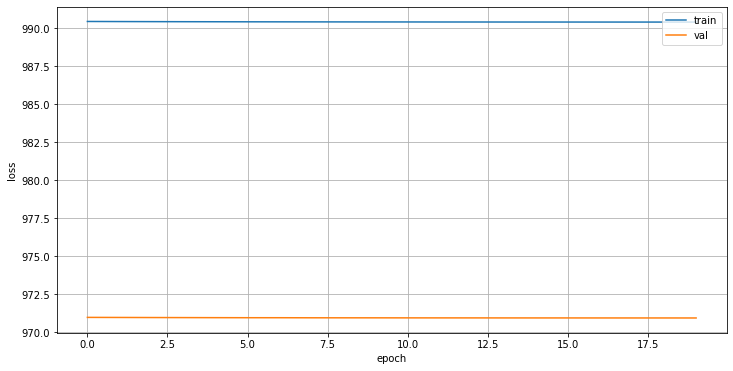